##The Perceptron

The simplest model of a neuron is that it takes a number of inputs, and when the total stimulus reaches a certain threshold, the neuron "fires" (sends out an electronic signal to another neuron).

Mathematically, we can model it in the following way:

$$y=\sum_{i = 1}^{n} {w_i x_i} = \vec{w} \cdot \vec{x} \tag {1}$$

where the $(x_1, x_2, ..., x_n)$ are the inputs, with different weights $(w_1, w_2, ..., w_n)$ for each of them, and $y$ is the total stimulus.

(In coding, $\vec{w}$ and $\vec{x}$ will be implemented as numpy arrays.)

The weighted sum $y$ of these inputs is then compared with a threshold, sometimes represented by step function:


$$z(y) = \begin{cases} 
      0 & y\leq 0 \\
      1 & y\gt 0
\end{cases} \tag {2}$$

Really, $z$ is a function of $\vec{x}$ and the weights, $\vec{w}$, $z(\vec{x}, \vec{w})$.

We then compare $z$ with a desired output: $d(\vec{x})$ (which obviously depends on the input, but not the weights).

Depending on how $z$ is different from $d$, we will adjust the weights to move $z$ closer and closer to $d$.  This process is called "training" (the weights).

This is what we call a *perceptron*.

One a perceptron is trained, it can then produce an output given a set of previously unseen inputs.

## There is one problem:

When the threshold function $z$ is written in the form of (2), $\vec{x} = 0$ is necessarily at the boundary.  This may or may not be desirable.

## The fix: Introducing the bias

$$
y=\sum_{i}^{n} {w_i x_i} + b = \vec{w} \cdot \vec{x} + b\tag {3}
$$

where $b$ is the bias.

Then, 
$$
z(y) = z(\vec{x}, \vec{w}; b) = \begin{cases}
      0 & y\leq 0 \\
      1 & y\gt 0
\end{cases} \tag{4}$$

The bias shifts the (threshold, or decision) boundary away from the origin and is independent on any input value.

## Conceptually, it's clearer to think of the problem in this way and treat the inputs and the bias distinctly.

## However, mathematically (and numerically):

*It's more convenient to implement the bias as an addition input with a constant value of 1.  Assign a weight for this (fake) input, then the weight is the same as the bias; $b$.*

## Simple Example:

## A perceptron that performs the AND operation on two inputs:

| $x_1$ | $x_2$ | $z$   |
|:-:    |:-:    |:-:    |   
|   0   |   0   |   0   |
|   0   |   1   |   0   |
|   1   |   0   |   0   |
|   1   |   1   |   1   |

 



## You'd think in this case, two inputs, $x_1$ and $x_2$ would be enough...

But acutally we need the bias.  Let's implement it as the third input; call it $x_3$ with an associated weight $w_3$.  You don't care about $w_3$ -- it's only there to help you achieve the desired outcome. 



In [1]:
%matplotlib inline
# All imports
from __future__ import print_function
from random import choice
import numpy as np
import matplotlib.pyplot as plt


## Mini-breakout:
- ## Write a python function that is the step function; call it step_function.
- ## Turn it into a lambda function; call it step_fn. 
- ## Modify your lambda function and call it step_fun so that you can plot it for x between -10 and 10, say.

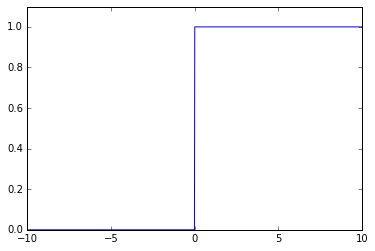

In [30]:
def z(y):
    if y <= 0:
        z = 0
    else:
        z = 1
    return z

step_fn = lambda y: 0 if y<=0 else 1

x = np.linspace(-10., 10., 1000)
step_fun = lambda y: y>0

plt.figure()
plt.plot(x,step_fun(x))
plt.ylim(0., 1.1)
plt.show()

In [77]:
'''
Perceptron to implement the NOR operation

With combined error.

'''

training_data = [
    (np.array([0,0,1]), 1),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 0),
]

# usu. random numbers for weights is not a bad starting point
w = np.random.rand(3)
errors = []

# "learning rate"
alfa = 0.2

# use 100 training steps
n = 100
# w.history = []
for i in xrange(n):
    x, target = choice(training_data)
    y = np.dot(w, x)
    error = target - step_fun(y)
    errors.append(error)
    w += alfa * error * x

print('weights:', w)
    
for x, _ in training_data:
    y = np.dot(x, w)
    # not including the bias, x[3]
    print("{}: {} -> {}".format(x[:2], y, step_fun(y)))

weights: [-0.29726537 -0.32977896  0.12638953]
[0 0]: 0.126389533404 -> True
[0 1]: -0.203389422098 -> False
[1 0]: -0.170875835586 -> False
[1 1]: -0.500654791088 -> False


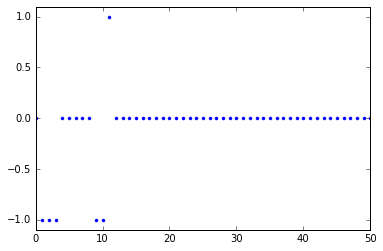

In [86]:
plt.plot(np.arange(n), errors, '.')
plt.ylim(-1.1, 1.1)
plt.xlim(0, 50)
plt.show()

In [88]:
x_test = np.array([0.4, 0.3, 1])
y = np.dot(x_test, w)
print("{}: {} -> {}".format(x_test[:2], y, step_fun(y)))

[ 0.4  0.3]: -0.0914503008425 -> False


## Let's turn this into a classifier!!

In [93]:
'''
Perceptron to implement the AND operation

There are lots of subtlties here.


'''
def NOR_perceptron_classifier(x, show_train = False):    
    training_data = [
        (np.array([0,0,1]), 1),
        (np.array([0,1,1]), 0),
        (np.array([1,0,1]), 0),
        (np.array([1,1,1]), 0),
    ]

    # usu. random numbers for weights is not a bad starting point
    w = np.random.rand(3)
    errors = []

    # "learning rate"
    alfa = 0.2

    # use 100 training steps
    n = 100
    # w.history = []
    for i in xrange(n):
        x_train, target = choice(training_data)
        y = np.dot(w, x_train)
        error = target - step_fun(y)
        errors.append(error)
        w += alfa * error * x_train
    
    if show_train:
        print('weights:', w)
        print('Training results:')
        for x_train, _ in training_data:
            y = np.dot(x_train, w)
            print("{}: {} -> {}".format(x_train[:2], y, step_fun(y)))
    
    x = np.append(x, 1)
    return step_fun(np.dot(x, w)), w

In [94]:
z, _ = NOR_perceptron_classifier(np.array([0.5, 1.0]))
print(z)

False


## Breakout: Try 20 pairs of random numbers between [0, 1]

- ## Classify them according their "z" value.

- ## Plot them, with color coding according their "z" value.


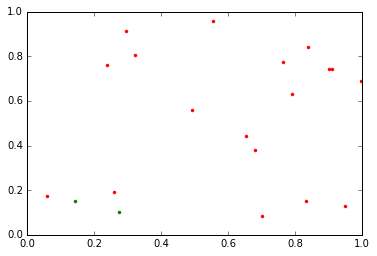

In [104]:
plt.figure()
for i in np.arange(20):
    test = np.random.rand(2)
    z, w = NOR_perceptron_classifier(test)
    if z == False:
        plt.plot(test[0], test[1], 'r.')
    else:
        plt.plot(test[0], test[1], 'g.')
plt.show()

## Breakout: Try 100 pairs of random numbers between [0, 1]

- ## Classify them according their "z" value.

- ## Plot them, with color coding according their "z" value.

- ## Plot the four training points using large symbols, also color coded according their "z" values.  For inspiration:

       http://matplotlib.org/api/pyplot_api.html

- ## Plot the decision boundary (a line) using w.

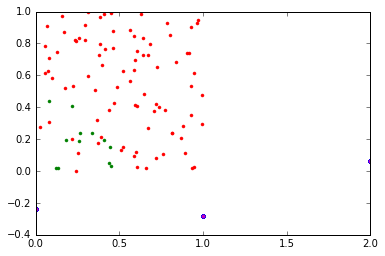

In [107]:
plt.figure()
for i in np.arange(100):
    test = np.random.rand(2)
    z, _ = NOR_perceptron_classifier(test)
    if z == False:
        plt.plot(test[0], test[1], 'r.')
        plt.plot(w, 'b.')
    else:
        plt.plot(test[0], test[1], 'g.')
        plt.plot(w, 'm.')

plt.show()

## Breakout: Generate 100 pairs of random numbers between [-10, 10]

- ## Classify them according their "z" value.

- ## Plot them, with color coding according their "z" value.

- ## Plot the decision boundary (a line) using w.

## Breakout: A general perceptron classifier:

      perceptron_classifier(training_data, x, show_train = False)